In [2]:
!gdown 1hsx6TOCrCeY3Rio9HSispg0MaYqF-tJb

Downloading...
From (original): https://drive.google.com/uc?id=1hsx6TOCrCeY3Rio9HSispg0MaYqF-tJb
From (redirected): https://drive.google.com/uc?id=1hsx6TOCrCeY3Rio9HSispg0MaYqF-tJb&confirm=t&uuid=5b177309-69da-40b1-b921-37947958512a
To: /content/creditcard_2023.csv
100% 325M/325M [00:03<00:00, 101MB/s]


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import time


#-------------------------------------------------------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")
#Data Collection
data = pd.read_csv('/content/creditcard_2023.csv')

In [24]:
random_state = 123
features = [col for col in data.columns if col not in ['id', 'Class']]
X_train, X_test, y_train, y_test = train_test_split(data[features], data['Class'], test_size=0.3, random_state=random_state, stratify=data['Class'], shuffle=True)
# features

In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
def show_model_results(model):
    pred = model.predict(X_test)
    pred = np.where(pred > 0.5, 1, 0)
    print(classification_report(y_test, pred))
    cm = confusion_matrix(y_test, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

def plot_history(history):
    training_loss = history.history['loss']
    validation_loss = history.history['val_loss']
    plt.plot(training_loss, label='Training Loss')
    plt.plot(validation_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [27]:
callbacks = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss`
        # is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined
        # as "no better than 1e-2 less"
        min_delta=1e-2,
        # "no longer improving" being further
        # defined as "for at least 2 epochs"
        patience=2,
        verbose=1,
    )
]


In [28]:
def create_cnnmodel(input_length):
    # Define model architecture
    model = keras.Sequential([
        Conv1D(filters=5, kernel_size=10, activation="relu",
          input_shape=(input_length, 1), strides=2),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(32, activation="relu"),
        Dense(1, activation="sigmoid")
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model


Epoch 1/20
622/622 [==============================] - 8s 11ms/step - loss: 0.1750 - accuracy: 0.9393 - val_loss: 0.1076 - val_accuracy: 0.9598
Epoch 2/20
622/622 [==============================] - 5s 9ms/step - loss: 0.0922 - accuracy: 0.9661 - val_loss: 0.0830 - val_accuracy: 0.9691
Epoch 3/20
622/622 [==============================] - 3s 4ms/step - loss: 0.0736 - accuracy: 0.9723 - val_loss: 0.0682 - val_accuracy: 0.9752
Epoch 4/20
622/622 [==============================] - 3s 4ms/step - loss: 0.0622 - accuracy: 0.9772 - val_loss: 0.0588 - val_accuracy: 0.9787
Epoch 5/20
622/622 [==============================] - 3s 4ms/step - loss: 0.0540 - accuracy: 0.9805 - val_loss: 0.0525 - val_accuracy: 0.9823
Epoch 6/20
622/622 [==============================] - 4s 6ms/step - loss: 0.0482 - accuracy: 0.9825 - val_loss: 0.0472 - val_accuracy: 0.9822
Epoch 7/20
622/622 [==============================] - 4s 6ms/step - loss: 0.0437 - accuracy: 0.9845 - val_loss: 0.0430 - val_accuracy: 0.9847
Epoch

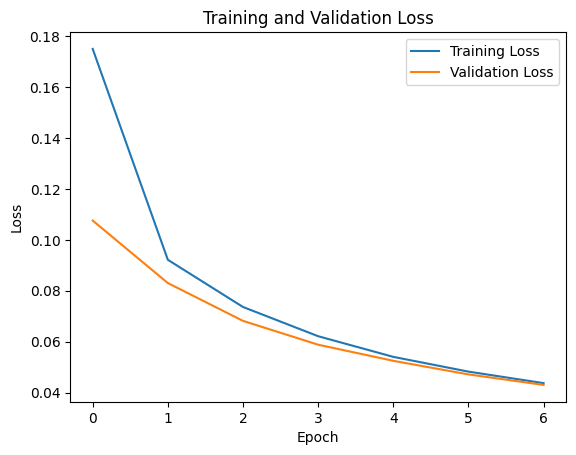

In [29]:
start_time = time.time()
cnn_model = create_cnnmodel(len(features))
history = cnn_model.fit(X_train, y_train, epochs=20, batch_size=512, verbose=1, validation_split=0.2, callbacks=callbacks)
print(f'training time: {round(time.time()-start_time, 2)} seconds')
plot_history(history)


5331/5331 [==============================] - 19s 3ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     85295
           1       0.99      0.98      0.99     85294

    accuracy                           0.99    170589
   macro avg       0.99      0.99      0.99    170589
weighted avg       0.99      0.99      0.99    170589



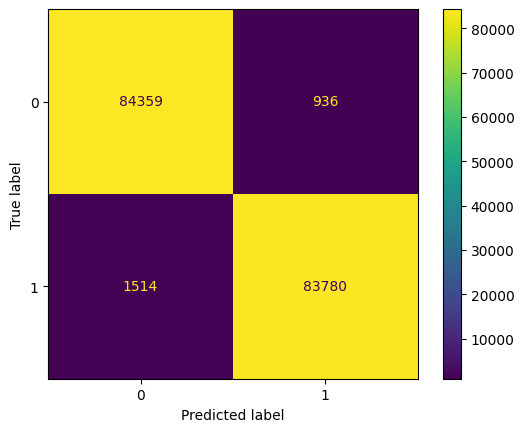

In [30]:
show_model_results(cnn_model)

In [31]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 10, 5)             55        
                                                                 
 max_pooling1d (MaxPooling1  (None, 5, 5)              0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 25)                0         
                                                                 
 dense (Dense)               (None, 32)                832       
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 920 (3.59 KB)
Trainable params: 920 (3.59 KB)
Non-trainable params: 0 (0.00 Byte)
__________________________

In [32]:
def create_deep_nnmodel(neurons):
    model = Sequential()
    model.add(Dense(neurons, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

Epoch 1/10
622/622 [==============================] - 7s 7ms/step - loss: 0.1189 - accuracy: 0.9578 - val_loss: 0.0357 - val_accuracy: 0.9877
Epoch 2/10
622/622 [==============================] - 5s 8ms/step - loss: 0.0286 - accuracy: 0.9908 - val_loss: 0.0145 - val_accuracy: 0.9957
Epoch 3/10
622/622 [==============================] - 5s 8ms/step - loss: 0.0153 - accuracy: 0.9958 - val_loss: 0.0096 - val_accuracy: 0.9975
Epoch 4/10
622/622 [==============================] - 5s 8ms/step - loss: 0.0104 - accuracy: 0.9974 - val_loss: 0.0070 - val_accuracy: 0.9984
Epoch 4: early stopping
training time: 23.21 seconds


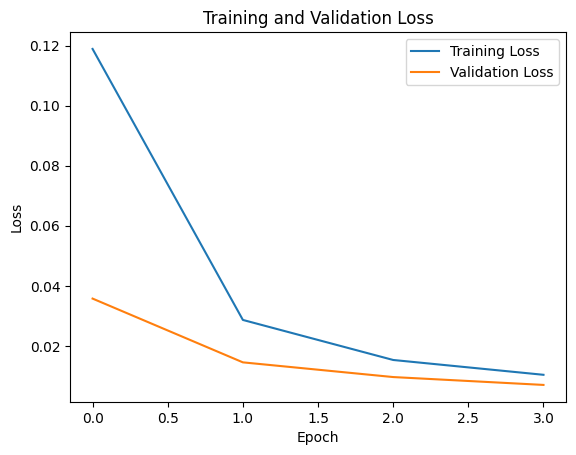

In [33]:
start_time = time.time()
deep_nn_model = create_deep_nnmodel(len(features))
history = deep_nn_model.fit(X_train, y_train, epochs=10, batch_size=512, verbose=1, validation_split=0.2, callbacks=callbacks)
print(f'training time: {round(time.time()-start_time, 2)} seconds')
plot_history(history)

5331/5331 [==============================] - 8s 1ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       1.00      1.00      1.00     85294

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



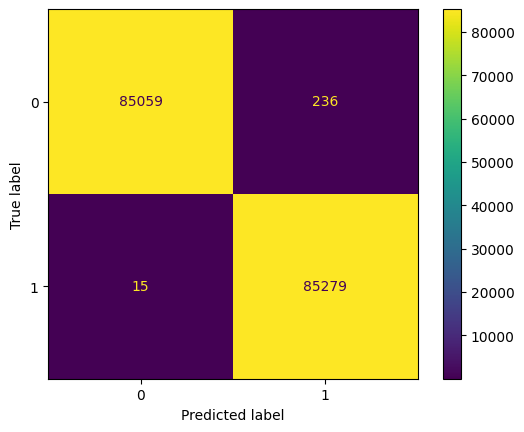

In [34]:
show_model_results(deep_nn_model)

In [35]:
deep_nn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 29)                870       
                                                                 
 dense_3 (Dense)             (None, 64)                1920      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 dropout_2 (Dropout)         (None, 16)               